# 7. GIS Maps with National Parks Data

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
parks = Table.read_table('http://faculty.ung.edu/rsinn/nationalparks.csv')
parks.num_rows

59

In [3]:
parks.labels

('title',
 'acres',
 'area_km_sq',
 'visitors',
 'state',
 'lat',
 'long',
 'established',
 'description',
 'image/url',
 'link',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13')

In [4]:
parks

title                        | acres   | area_km_sq | visitors | state          | lat    | long    | established | description                                                  | image/url                        | link                               | Unnamed: 11 | Unnamed: 12 | Unnamed: 13
Acadia                       | 49057.4 | 198.5      | 3303393  | Maine          | 44.35  | -68.21  | 2/26/1919   | Covering most of Mount Desert Island and other coastal i ... | acadia.jpg                       | https://www.nps.gov/acad/index.htm | nan         | nan         | nan
American Samoa               | 8256.67 | 33.4       | 28892    | American Samoa | -14.25 | -170.68 | 10/31/1988  | The southernmost National Park is on three Samoan island ... | american-samoa.jpg               | https://www.nps.gov/npsa/index.htm | nan         | nan         | nan
Arches                       | 76679   | 310.3      | 1585718  | Utah           | 38.68  | -109.57 | 11/12/1971  | This site features more than 2,000 natural sandstone arc ... | arches.jpg                       | https://www.nps.gov/arch/index.htm | nan         | nan         | nan
Badlands                     | 242756  | 982.4      | 996263   | South Dakota   | 43.75  | -102.5  | 11/10/1978  | The Badlands are a collection of buttes, pinnacles, spir ... | badlands.jpg                     | https://www.nps.gov/badl/index.htm | nan         | nan         | nan
Big Bend                     | 801163  | 3242.2     | 388290   | Texas          | 29.25  | -103.25 | 6/12/1944   | Named for the prominent bend in the Rio Grande along the ... | big-bend.jpg                     | https://www.nps.gov/bibe/index.htm | nan         | nan         | nan
Biscayne                     | 172971  | 700        | 514709   | Florida        | 25.65  | -80.08  | 6/28/1980   | Located in Biscayne Bay, this park at the north end of t ... | biscayne.jpg                     | https://www.nps.gov/bisc/index.htm | nan         | nan         | nan
Black Canyon of the Gunnison | 30749.8 | 124.4      | 238018   | Colorado       | 38.57  | -107.72 | 10/21/1999  | The park protects a quarter of the Gunnison River, which ... | black-canyon-of-the-gunnison.jpg | https://www.nps.gov/blca/index.htm | nan         | nan         | nan
Bryce Canyon                 | 35835.1 | 145        | 2365110  | Utah           | 37.57  | -112.18 | 2/25/1928   | Bryce Canyon is a geological amphitheater on the Paunsau ... | bryce-canyon.jpg                 | https://www.nps.gov/brca/index.htm | nan         | nan         | nan
Canyonlands                  | 337598  | 1366.2     | 776218   | Utah           | 38.2   | -109.93 | 9/12/1964   | This landscape was eroded into a maze of canyons, buttes ... | canyonlands.jpg                  | https://www.nps.gov/cany/index.htm | nan         | nan         | nan
Capitol Reef                 | 241904  | 979        | 1064904  | Utah           | 38.2   | -111.17 | 12/18/1971  | The park's Waterpocket Fold is a 100-mile (160 km) monoc ... | capitol-reef.jpg                 | https://www.nps.gov/care/index.htm | nan         | nan         | nan
... (49 rows omitted)

In [5]:
parks.group('state').sort('count', descending = True)

state        | count
California   | 9
Alaska       | 8
Utah         | 5
Colorado     | 4
Arizona      | 3
Florida      | 3
Washington   | 3
Hawaii       | 2
South Dakota | 2
Texas        | 2
... (17 rows omitted)

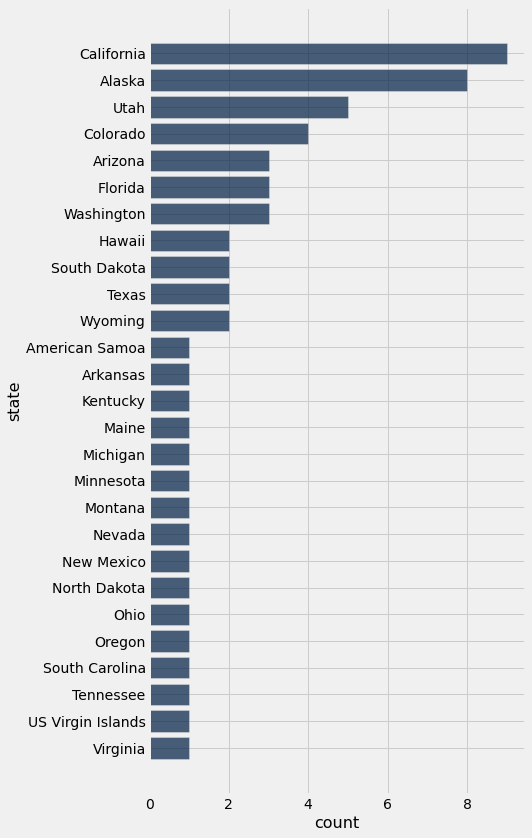

In [6]:
parks.group('state').sort('count', descending = True).barh('state','count')

In [7]:
visit = parks.select('title','acres','visitors', 'lat','long').relabel(0,'name')
visit

name                         | acres   | visitors | lat    | long
Acadia                       | 49057.4 | 3303393  | 44.35  | -68.21
American Samoa               | 8256.67 | 28892    | -14.25 | -170.68
Arches                       | 76679   | 1585718  | 38.68  | -109.57
Badlands                     | 242756  | 996263   | 43.75  | -102.5
Big Bend                     | 801163  | 388290   | 29.25  | -103.25
Biscayne                     | 172971  | 514709   | 25.65  | -80.08
Black Canyon of the Gunnison | 30749.8 | 238018   | 38.57  | -107.72
Bryce Canyon                 | 35835.1 | 2365110  | 37.57  | -112.18
Canyonlands                  | 337598  | 776218   | 38.2   | -109.93
Capitol Reef                 | 241904  | 1064904  | 38.2   | -111.17
... (49 rows omitted)

In [8]:
visit.sort('visitors', descending = True)

name                  | acres       | visitors | lat   | long
Great Smoky Mountains | 522427      | 11312786 | 35.68 | -83.53
Grand Canyon          | 1.20165e+06 | 5969811  | 36.06 | -112.14
Yosemite              | 761748      | 5028868  | 37.83 | -119.5
Rocky Mountain        | 265795      | 4517585  | 40.4  | -105.58
Zion                  | 147237      | 4295127  | 37.3  | -113.05
Yellowstone           | 2.21979e+06 | 4257177  | 44.6  | -110.5
Olympic               | 922650      | 3390221  | 47.97 | -123.5
Acadia                | 49057.4     | 3303393  | 44.35 | -68.21
Grand Teton           | 310044      | 3270076  | 43.73 | -110.8
Glacier               | 1.01313e+06 | 2946681  | 48.8  | -114
... (49 rows omitted)

````{warning}
The values in the acres and visitors columns are strings, not numbers. I will attempt to repair and repost soon.
````

In [9]:
Circle.map_table(visit.select('lat', 'long', 'name'), area=2)